In [1]:
import os

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from pycaret.classification import *
from sklearn.metrics import *
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/Wine Quality/WineQuality.csv'

In [3]:
df = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

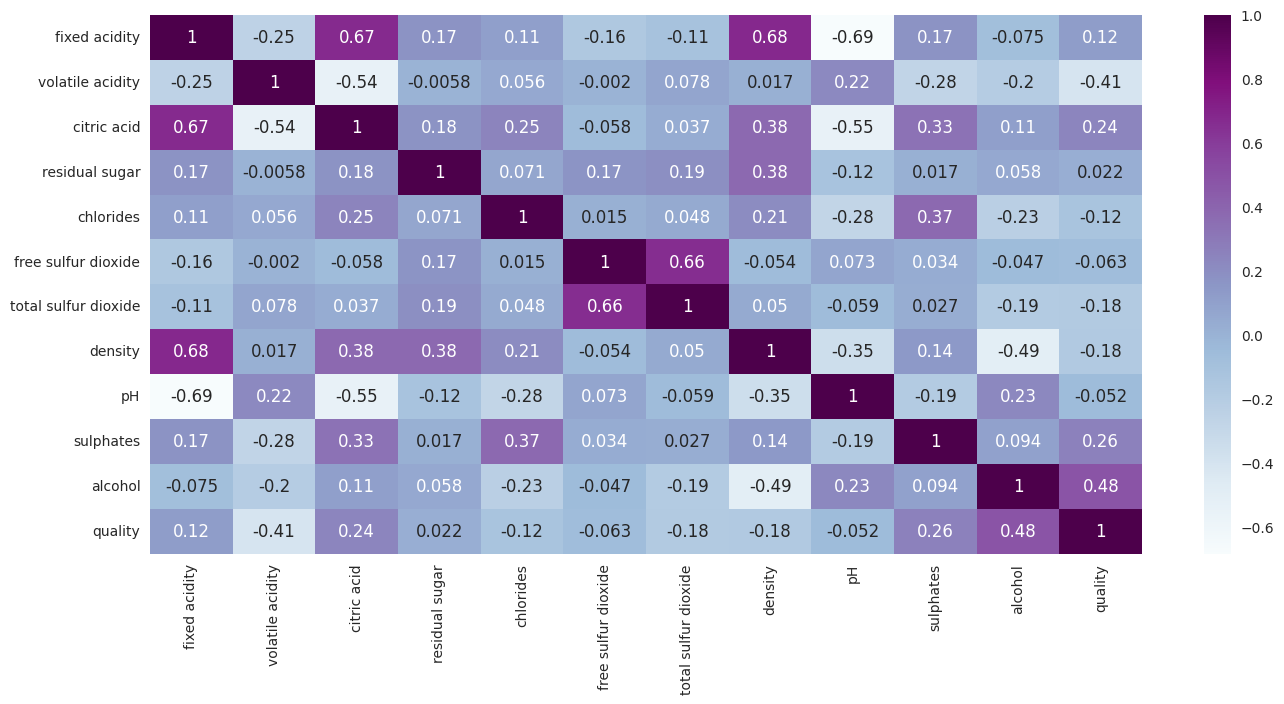

In [4]:
df    = df.drop(['Id'], axis = 1)
_, ax = plt.subplots(figsize = (16, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')

In [5]:
x = df.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'quality'], axis = 1)
y = df.quality

In [6]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [7]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.2, 
                                                      stratify = y, random_state = 99)

train_x, test_x , train_y, test_y  = train_test_split(train_x, train_y, test_size = 0.25,
                                                      stratify = train_y, random_state = 99)

In [8]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

print(f'[TRAIN SCORE] : {rf.score(train_x, train_y)}')
print(f'[TEST  SCORE] : {rf.score(test_x ,  test_y)}')
print(f'[VALID SCORE] : {rf.score(valid_x, valid_y)}')

print('[TRAIN]')
print(classification_report(train_y, rf.predict(train_x)))

print('[TEST]')
print(classification_report(test_y, rf.predict(test_x)))

print('[VALID]')
print(classification_report(valid_y, rf.predict(valid_x)))

[TRAIN SCORE] : 1.0
[TEST  SCORE] : 0.6200873362445415
[VALID SCORE] : 0.6200873362445415
[TRAIN]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00       289
           6       1.00      1.00      1.00       277
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        10

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

[TEST]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.66      0.74      0.70        97
           6       0.56      0.61      0.59        93
           7       0.72      0.45      0.55        29
           8       0.00    

In [9]:
sampler    = RandomOverSampler(random_state = 999)
x_os, y_os = sampler.fit_resample(train_x, train_y) 
y_os.value_counts()

8    289
7    289
6    289
5    289
4    289
3    289
Name: quality, dtype: int64

In [10]:
rf_os = RandomForestClassifier(n_estimators = 20)
rf_os.fit(x_os, y_os)

print(f'[TRAIN SCORE] : {rf_os.score(x_os   ,    y_os)}')
print(f'[TEST  SCORE] : {rf_os.score(test_x ,  test_y)}')
print(f'[VALID SCORE] : {rf_os.score(valid_x, valid_y)}')

print('[TRAIN]')
print(classification_report(y_os   ,    rf_os.predict(x_os)))

print('[TEST]')
print(classification_report(test_y ,  rf_os.predict(test_x)))

print('[VALID]')
print(classification_report(valid_y, rf_os.predict(valid_x)))

[TRAIN SCORE] : 0.9994232987312572
[TEST  SCORE] : 0.5807860262008734
[VALID SCORE] : 0.6026200873362445
[TRAIN]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       289
           4       1.00      1.00      1.00       289
           5       1.00      1.00      1.00       289
           6       1.00      1.00      1.00       289
           7       1.00      1.00      1.00       289
           8       1.00      1.00      1.00       289

    accuracy                           1.00      1734
   macro avg       1.00      1.00      1.00      1734
weighted avg       1.00      1.00      1.00      1734

[TEST]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.65      0.73      0.69        97
           6       0.57      0.52      0.54        93
           7       0.48      0.48      0.48        29
           8

In [11]:
df_cls           = df.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)
train_x, valid_x = train_test_split(df_cls, test_size = 0.2, shuffle = True)

cls              = setup(train_x, target = 'quality', train_size = 0.75)
best_model       = compare_models()

,Description,Value
0,Session id,710
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(914, 9)"
5,Transformed data shape,"(914, 9)"
6,Transformed train set shape,"(685, 9)"
7,Transformed test set shape,"(229, 9)"
8,Numeric features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6482,0.3146,0.6472,0.6304,0.6260,0.4285,0.4333,0.3730
rf,Random Forest Classifier,0.6350,0.3157,0.6293,0.6065,0.6108,0.4079,0.4121,0.4940
catboost,CatBoost Classifier,0.6334,0.3019,0.6263,0.6008,0.6087,0.4082,0.4113,15.5630
lightgbm,Light Gradient Boosting Machine,0.6203,0.2988,0.6205,0.6000,0.6045,0.3886,0.3919,318.6780
gbc,Gradient Boosting Classifier,0.6116,0.2974,0.6103,0.5853,0.5914,0.3730,0.3767,1.4500
lr,Logistic Regression,0.5914,0.2948,0.5694,0.5350,0.5286,0.3128,0.3212,1.5410
lda,Linear Discriminant Analysis,0.5871,0.2907,0.5640,0.5394,0.5434,0.3220,0.3267,0.0640
ridge,Ridge Classifier,0.5857,0.0000,0.5468,0.4481,0.4906,0.2907,0.3029,0.0540
dt,Decision Tree Classifier,0.5577,0.2454,0.5467,0.5431,0.5426,0.3042,0.3053,0.0630
qda,Quadratic Discriminant Analysis,0.5549,0.2864,0.5277,0.5230,0.5205,0.3116,0.3145,0.0650


In [12]:
model = finalize_model(best_model)
